# Clean And Analyze Employee Exit Surveys

This analysis will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Our goal is to find out the following:
 * Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
 * Are younger employees resigning due to some kind of dissatisfaction? What about older employees?
 
Need to combine the results for both surveys to answer these questions. However, although both used the same survey template, one of them customized some of the answers.

Let's start by reading the datasets into pandas and exploring them.

In [1]:
import pandas as pd
import numpy as np

dete = pd.read_csv("dete_survey.csv")
tafe = pd.read_csv("tafe_survey.csv")

In [2]:
#DETE dataset

dete.info()
dete.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
#TAFE dataset

tafe.info()
tafe.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


We can make the following observations:
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.
* Each dataframe contains many of the same columns, but the column names are different.
* There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

In [4]:
dete = pd.read_csv("dete_survey.csv", na_values = 'Not Stated')

dete_updated = dete.drop(dete.iloc[:,28:49], axis = 1)

In [5]:
tafe = pd.read_csv("tafe_survey.csv", na_values = False)

tafe_updated = tafe.drop(tafe.iloc[:,17:66], axis = 1)

The changes were made because these columns were not useful in helping to answer our questions.  

In [6]:
#standardising column names
dete_updated.columns = dete_updated.columns.str.lower().str.strip().str.replace(" ", "_")

dete_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [7]:
new = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment': 'separationtype', 'Gender. What is your Gender?': 'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_updated.rename(new, inplace = True, axis = 1)



If we look at the unique values in the separationtype columns in each dataframe, we'll see that each contains a couple of different separation types. For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [8]:
dete_updated["separationtype"].value_counts()



Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [9]:
tafe_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [10]:
dete_resignations = dete_updated.copy()

dete_resignations = dete_resignations[dete_resignations["separationtype"].str.contains("Resignation")]


In [11]:
tafe_resignations = tafe_updated.copy()

tafe_resignations = tafe_resignations[tafe_resignations["separationtype"].str.contains("Resignation", na = False)]


We'll now focus on verifying that the years in the cease_date and dete_start_date columns make sense. 
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.

* Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

In [12]:
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
07/2012      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [13]:
dete_resignations["cease_date"] = dete_resignations["cease_date"].str.split("/").str[-1]
dete_resignations["cease_date"].astype("float")

dete_resignations["cease_date"].value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [14]:
dete_resignations["dete_start_date"].astype("float").value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [15]:
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [16]:
#shows length of service
dete_resignations["institute_service"] = dete_resignations["cease_date"].astype("float") - dete_resignations["dete_start_date"].astype("float")

dete_resignations["institute_service"]

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

We'll identify any employees who resigned because they were dissatisfied.

In [17]:
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [18]:
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [19]:
def update_vals(val):
    if val == "-":
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

tafe_cols = ["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].applymap(update_vals).any(1, skipna=False)
    
dete_col=['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload',]   
dete_resignations['dissatisfied']=dete_resignations[dete_col].applymap(update_vals).any(axis=1,skipna=False)  

In [20]:
tafe_resignations['dissatisfied'].head()

3    False
4    False
5    False
6    False
7    False
Name: dissatisfied, dtype: object

In [21]:
dete_resignations['dissatisfied'].head()

3     True
5     True
8     True
9     True
11    True
Name: dissatisfied, dtype: bool

In [22]:
#create a copy of the results and avoid the SettingWithCopy Warning

dete_resignations_up=dete_resignations.copy()
tafe_resignations_up=tafe_resignations.copy()


After our changes, the new dissatisfied column will contain just the following values:

* True: indicates a person resigned because they were dissatisfied with the job
* False: indicates a person resigned because of a reason other than dissatisfaction with the job
* NaN: indicates the value is missing

To recap, we've accomplished the following:

* Renamed our columns
* Dropped any data not needed for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

Now, we're finally ready to combine our datasets!

In [23]:
#Add a column to each dataframe that will allow us to easily distinguish between the two.

dete_resignations_up["institute"] = "DETE"

tafe_resignations_up["institute"] = "TAFE"

In [24]:
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation-Other reasons,2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,True,DETE
5,6,Resignation-Other reasons,2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE
8,9,Resignation-Other reasons,2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0,True,DETE
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0,True,DETE
12,13,Resignation-Other reasons,2012,1998.0,1998.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,14.0,True,DETE
14,15,Resignation-Other employer,2012,2007.0,2010.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,5.0,True,DETE
16,17,Resignation-Other reasons,2012,NaN,NaN,Teacher Aide,NaN,South East,NaN,Permanent Part-time,...,Male,61 or older,NaN,NaN,NaN,NaN,NaN,NaN,True,DETE
20,21,Resignation-Other employer,2012,1982.0,1982.0,Teacher,Secondary,Central Queensland,NaN,Permanent Full-time,...,Male,56-60,NaN,NaN,NaN,NaN,NaN,30.0,True,DETE
21,22,Resignation-Other reasons,2012,1980.0,2009.0,Cleaner,NaN,Darling Downs South West,NaN,Permanent Part-time,...,Female,51-55,NaN,NaN,NaN,NaN,NaN,32.0,True,DETE


In [25]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Other,-,Female,36 40,Temporary Full-time,Tutor,3-4,3-4,False,TAFE
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Other,-,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2,False,TAFE
10,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Female,41 45,Temporary Part-time,Administration (AO),Less than 1 year,Less than 1 year,False,TAFE
13,6.341725e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Temporary Full-time,Administration (AO),11-20,Less than 1 year,False,TAFE
14,6.341726e+17,Central Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Female,31 35,Permanent Part-time,Teacher (including LVT),7-10,7-10,True,TAFE


In [41]:
#Combine the dataframes

combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True)

combined_updated = combined.dropna(thresh = 500, axis =1)

# combined_updated = combined_updated[combined_updated["dissatisfied"] == True]

combined_updated




,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012,True,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012,True,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012,True,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation-Move overseas/interstate
5,36-40,2012,True,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation-Other reasons
6,31-35,2012,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation-Other employer
7,61 or older,2012,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons
8,56-60,2012,True,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation-Other employer
9,51-55,2012,True,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation-Other reasons


We'll have to clean up the institute_service column. This column is tricky to clean because it currently contains values in a couple different forms



In [42]:
combined_updated["institute_service"].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
17.0                   6
22.0                   6
12.0                   6
14.0                   6
10.0                   6
16.0                   5
18.0                   5
23.0                   4
11.0                   4
24.0                   4
19.0                   3
21.0                   3
39.0                   3
32.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2
27.0                   1


In [43]:
combined_updated["institute_service"] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')

combined_updated["institute_service"] = combined_updated["institute_service"].astype('float')

combined_updated["institute_service"]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

0       7.0
1      18.0
2       3.0
3      15.0
4       3.0
5      14.0
6       5.0
7       NaN
8      30.0
9      32.0
10     15.0
11     39.0
12     17.0
13      7.0
14      9.0
15      6.0
16      1.0
17      NaN
18     35.0
19     38.0
20      1.0
21     36.0
22      3.0
23      3.0
24     19.0
25      4.0
26      9.0
27      1.0
28      6.0
29      1.0
       ... 
621     1.0
622     3.0
623     5.0
624     NaN
625     NaN
626     3.0
627     NaN
628     1.0
629     1.0
630     1.0
631     1.0
632     3.0
633     1.0
634     1.0
635     1.0
636     1.0
637     3.0
638     1.0
639     5.0
640     5.0
641     1.0
642     NaN
643     3.0
644     1.0
645     NaN
646     5.0
647     1.0
648     NaN
649     5.0
650     3.0
Name: institute_service, Length: 651, dtype: float64

Categorising employees based on years of service.

In [44]:
def cat_service(val):
    if val < 3:
        return "New"
    elif 3 <= val <7:
        return "Experienced"
    elif 7 <= val < 11:
        return "Established"
    elif val >= 11:
        return "Veteran"
    elif pd.isnull(val):
        return np.nan
    
combined_updated["service_cat"] = combined_updated["institute_service"].apply(cat_service)

combined_updated["service_cat"]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0      Established
1          Veteran
2      Experienced
3          Veteran
4      Experienced
5          Veteran
6      Experienced
7              NaN
8          Veteran
9          Veteran
10         Veteran
11         Veteran
12         Veteran
13     Established
14     Established
15     Experienced
16             New
17             NaN
18         Veteran
19         Veteran
20             New
21         Veteran
22     Experienced
23     Experienced
24         Veteran
25     Experienced
26     Established
27             New
28     Experienced
29             New
          ...     
621            New
622    Experienced
623    Experienced
624            NaN
625            NaN
626    Experienced
627            NaN
628            New
629            New
630            New
631            New
632    Experienced
633            New
634            New
635            New
636            New
637    Experienced
638            New
639    Experienced
640    Experienced
641            New
642         

In [45]:
combined_updated["service_cat"].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [56]:
new = combined_updated.copy()


In [57]:
new['dissatisfied'] = new['dissatisfied'].fillna(False)

In [58]:
dissatisfied_true = new[new['dissatisfied'] == True]
dissatisfied_true

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36-40,2012,True,Permanent Full-time,Female,4.000000e+00,DETE,7.0,Teacher,Resignation-Other reasons,Established
1,41-45,2012,True,Permanent Full-time,Female,6.000000e+00,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
2,31-35,2012,True,Permanent Full-time,Female,9.000000e+00,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
3,46-50,2012,True,Permanent Part-time,Female,1.000000e+01,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
4,31-35,2012,True,Permanent Full-time,Male,1.200000e+01,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced
5,36-40,2012,True,Permanent Full-time,Female,1.300000e+01,DETE,14.0,Teacher,Resignation-Other reasons,Veteran
6,31-35,2012,True,Permanent Full-time,Male,1.500000e+01,DETE,5.0,Teacher,Resignation-Other employer,Experienced
7,61 or older,2012,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons,NaN
8,56-60,2012,True,Permanent Full-time,Male,2.100000e+01,DETE,30.0,Teacher,Resignation-Other employer,Veteran
9,51-55,2012,True,Permanent Part-time,Female,2.200000e+01,DETE,32.0,Cleaner,Resignation-Other reasons,Veteran


In [85]:
table = new.pivot_table(index = "service_cat", values = ["dissatisfied"])
table

,dissatisfied
service_cat,
Established,0.774194
Experienced,0.581395
New,0.476684
Veteran,0.808824


In [77]:
%matplotlib inline

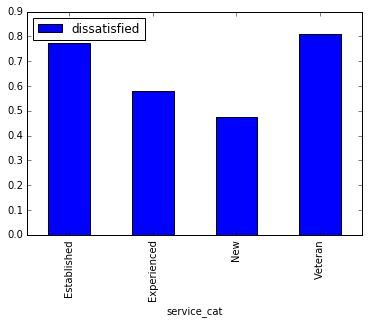

In [82]:
table.plot(kind='bar')


**The longer people have worked, the more resignations are due to job dissatisfactions.**

In [93]:
#clean the age column

new["age"].value_counts()


51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
31-35            29
56 or older      29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [96]:
new["age"] = new["age"].astype('str').str.extract(r'(\d+)')
new["age"] = new["age"].astype('float')
new["age"]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat
0,36.0,2012,True,Permanent Full-time,Female,4.000000e+00,DETE,7.0,Teacher,Resignation-Other reasons,Established
1,41.0,2012,True,Permanent Full-time,Female,6.000000e+00,DETE,18.0,Guidance Officer,Resignation-Other reasons,Veteran
2,31.0,2012,True,Permanent Full-time,Female,9.000000e+00,DETE,3.0,Teacher,Resignation-Other reasons,Experienced
3,46.0,2012,True,Permanent Part-time,Female,1.000000e+01,DETE,15.0,Teacher Aide,Resignation-Other employer,Veteran
4,31.0,2012,True,Permanent Full-time,Male,1.200000e+01,DETE,3.0,Teacher,Resignation-Move overseas/interstate,Experienced
5,36.0,2012,True,Permanent Full-time,Female,1.300000e+01,DETE,14.0,Teacher,Resignation-Other reasons,Veteran
6,31.0,2012,True,Permanent Full-time,Male,1.500000e+01,DETE,5.0,Teacher,Resignation-Other employer,Experienced
7,61.0,2012,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation-Other reasons,NaN
8,56.0,2012,True,Permanent Full-time,Male,2.100000e+01,DETE,30.0,Teacher,Resignation-Other employer,Veteran
9,51.0,2012,True,Permanent Part-time,Female,2.200000e+01,DETE,32.0,Cleaner,Resignation-Other reasons,Veteran


In [114]:
table1 = new.pivot_table(index = "service_cat", values = ["age"])
table1

,age
service_cat,
Established,38.500000
Experienced,36.883721
New,34.609375
Veteran,48.296296
